# Automatic creation of EO datasets for AI applications
###### By Alessandro Sebastianelli, alessandro.sebastianelli1995@gmail.com

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point,Polygon
import pandas as pd
import numpy as np
%matplotlib inline

In [54]:
import platform
system = platform.system()

if system == 'Windows':
    windows = True
else:
    windows = False

## Components 

In [55]:
# ~~~~~ Generator ~~~~~~
generate =   False
# ~~~~~ Downloader ~~~~~~
download =   True
# ~~~~~~ Converter ~~~~~~
convert_s2 = False
convert_s1 = False
# ~~~~~~ Cleaner ~~~~~~~~
clean_s2 =   False
clean_s1 =   False  

## Generator
#### Settings

In [56]:
n_of_points = 5000

if windows:
    points_path = 'C:\\Users\\Phicollaborator\\Desktop\\downloader_tool\\code\\points.csv'
else:
    points_path = '/home/sebbyraft/Desktop/downloader_tool/code/points.csv'

#### Execution

In [57]:
import generator
if generate:
    points = generator.get_land_coordinates(n_of_points)
    generator.save_points(points, points_path)
else:
    points = generator.load_points(points_path)

   # Points loaded


## Downloader
#### Settings

In [58]:
if windows:
    download_path = 'C:\\Users\\Phicollaborator\\Desktop\\downloader_tool\\code\\download'
    downloads_folder_path = download_path+'\\*'
    sen2_images_base_path = 'C:\\Users\\Phicollaborator\\Desktop\\downloader_tool\\code\\data\\sen2\\'
    sen1_images_base_path = 'C:\\Users\\Phicollaborator\\Desktop\\downloader_tool\\code\\data\\sen1\\'
else:
    download_path = '/home/sebbyraft/Desktop/downloader_tool/code/download'
    downloads_folder_path = download_path+'/*'
    sen2_images_base_path = '/home/sebbyraft/Desktop/downloader_tool/code/data/sen2/'
    sen1_images_base_path = '/home/sebbyraft/Desktop/downloader_tool/code/data/sen1/'

start_date = ['2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01']
end_date =   ['2018-01-28','2018-02-28','2018-03-28','2018-04-28','2018-05-28','2018-06-28','2018-07-28','2018-08-28','2018-09-28','2018-10-28','2018-11-28','2018-12-28']
date_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
n_images = 3
s2_selectors = ["B2", "B3", "B4", "QA60"]
s1_selectors = ["VV"]
n_of_scene = 20
patch_size = 10 #km

### Select the points that have not yet been downloaded and update the data frame

In [59]:
points = generator.get_new_points(n_of_scene, '/home/sebbyraft/Desktop/downloader_tool/code/points.csv')

   # Points saved


### Plot generated points VS selected points

In [60]:
df = pd.read_csv('/home/sebbyraft/Desktop/downloader_tool/code/points.csv')
crs = {'init': 'epsg:4326'}
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Latitude,Longitude,State
0,-30.113892,26.161607,1.0
1,-3.247389,121.185962,1.0
2,67.563110,106.175023,1.0
3,70.287130,67.278503,2.0
4,8.796222,-2.828506,1.0


In [61]:
w_map = gpd.read_file('/home/sebbyraft/Desktop/downloader_tool/code/map/ne_110m_land.shp')

In order to plot the generated point on a world map, firt of all we need to read the points form the csv file, then we convert the pandas dataframe into a georeferenced datadrame (with geopandas).

In [62]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

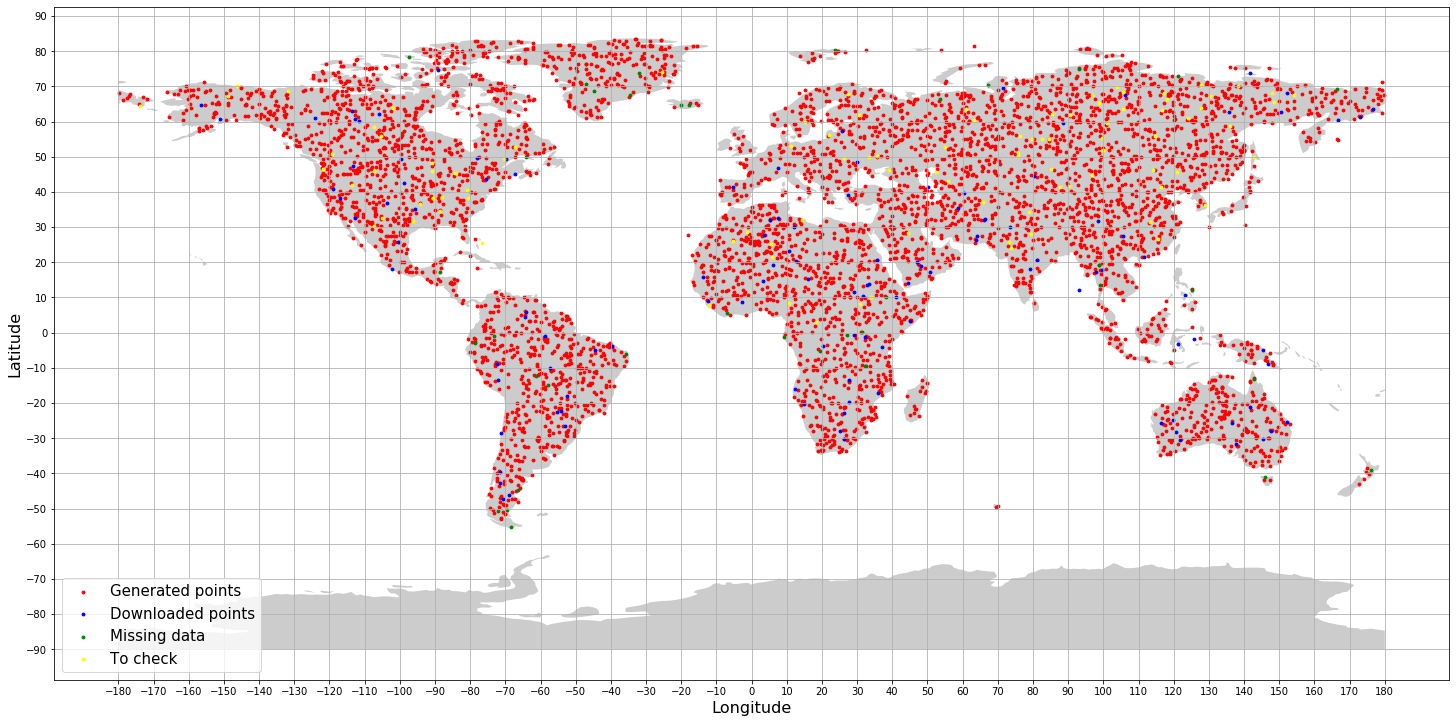

In [63]:
fig, ax = plt.subplots(figsize=(25,25))
w_map.plot(ax=ax, alpha=0.4, color='gray')
geo_df[geo_df['State']==0].plot(ax=ax, markersize=8, color='red', marker="o", label='Generated points')
geo_df[geo_df['State']==1].plot(ax=ax, markersize=8, color='blue', marker="o", label='Downloaded points')
geo_df[geo_df['State']==2].plot(ax=ax, markersize=8, color='green', marker="o", label='Missing data')
geo_df[geo_df['State']==3].plot(ax=ax, markersize=8, color='yellow', marker="o", label='To check')

plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.legend(prop={'size':15})
plt.xticks(np.arange(-180, 190, 10.0))
plt.yticks(np.arange(-90, 100, 10.0))
plt.grid()
plt.show()

In [64]:
geo_df[geo_df['State']==1].shape

(121, 4)

As you can see, the generator distributes the points all over the world, but for the download process we have to select only some of these examples. This can lead to a sparse representation of the lands.

#### Execution

In [ ]:
if download:
    import downloader
    downloader.download(points, patch_size, start_date, end_date, date_names,s2_selectors,s1_selectors,n_of_scene,n_images,downloads_folder_path,download_path, sen2_images_base_path, sen1_images_base_path, windows)

   # Sentinel-2 data downloading
     > Sentinel-2 region 1 of 20 download started
          * Zone lat_18.090598210797264_lon_79.01163445657393, period: Jan, img: 1 of 3
          * Zone lat_18.090598210797264_lon_79.01163445657393, period: Jan, img: 2 of 3
          * Zone lat_18.090598210797264_lon_79.01163445657393, period: Jan, img: 3 of 3
          => Downloaded 3 of 3
               + Extracting file 1 of 3
               + Extracting file 2 of 3
               + Extracting file 3 of 3
          * Zone lat_18.090598210797264_lon_79.01163445657393, period: Feb, img: 1 of 3
          * Zone lat_18.090598210797264_lon_79.01163445657393, period: Feb, img: 2 of 3
          * Zone lat_18.090598210797264_lon_79.01163445657393, period: Feb, img: 3 of 3
          => Downloaded 3 of 3
               + Extracting file 1 of 3
               + Extracting file 2 of 3
               + Extracting file 3 of 3
          * Zone lat_18.090598210797264_lon_79.01163445657393, period: Mar, img: 1 of 3

## Converter
#### Settings

In [ ]:
s2_selectors = ["B4", "B3", "B2", "QA60"]
s1_selectors = ["VV"]
resolution = 10
patch_size_meter = patch_size*1000
patch_size_in_pixel = int(patch_size_meter/resolution)

image_size = (patch_size_in_pixel, patch_size_in_pixel) 
if windows:
    s2_path = sen2_images_base_path+'*'
    s1_path = sen1_images_base_path+'*'
else:
    s2_path = sen2_images_base_path+'*'
    s1_path = sen1_images_base_path+'*'

#### Execution

In [116]:
if convert_s2:
    import converter_v_2
    converter_v_2.convert_s2(s2_path, s1_path, image_size, s2_selectors, s1_selectors, 's&n', windows)
if convert_s1:
    import converter_v_2
    converter_v_2.convert_s1(s2_path, s1_path, image_size, s2_selectors, s1_selectors, 's&n', windows)

## Cleaner
#### Settings

In [118]:
if windows:
    s2_path = 'C:\\Users\\Phicollaborator\\Desktop\\downloader_tool\\code\\dataset\\sen2\\*'
    s1_path = 'C:\\Users\\Phicollaborator\\Desktop\\downloader_tool\\code\\dataset\\sen1\\*'
else:
    s2_path = '/home/sebbyraft/Desktop/downloader_tool/code/dataset/sen2/*'
    s1_path = '/home/sebbyraft/Desktop/downloader_tool/code/dataset/sen1/*'

#### Execution

In [119]:
if clean_s2:
    import cleaner_v_2
    cleaner_v_2.clean_s2(s2_path, date_names, windows)
if clean_s1:
    import cleaner_v_2
    cleaner_v_2.clean_s1(s1_path, date_names, windows)